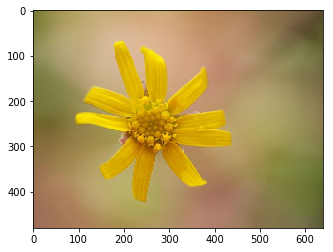

In [66]:
#coding:utf-8
%matplotlib inline
'''
拉普拉斯算子卷积滤波
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

src = cv2.imread('datas/f1.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

In [34]:
def laplace(src,template):
    dsrc=np.array(src,np.double)
    res=signal.convolve2d(dsrc,template,mode="same")
    return res

float64


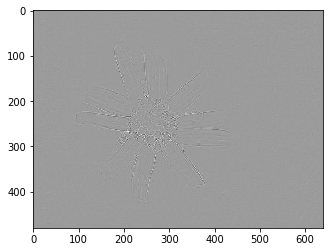

In [38]:
template = np.array([[0,1,0],[1,-4,1],[0,1,0]])
dst = laplace(gray,template)
print(dst.dtype)
plt.imshow(dst, cmap ='gray')

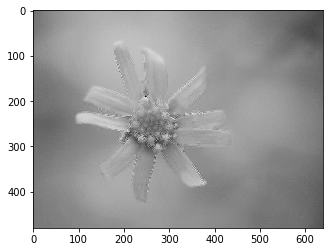

In [43]:
sharp = cv2.add(np.float64(gray),dst)
plt.imshow(np.uint8(sharp), cmap ='gray')

float64


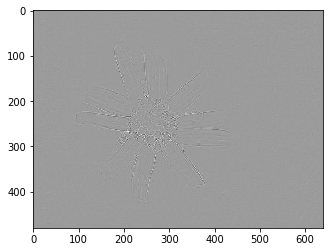

In [45]:
'''
高斯拉普拉斯算子卷积滤波
https://www.cnblogs.com/pangblog/p/3318000.html
'''
#高斯拉普拉斯算子模板
template = np.array([
    [0,0,1,0,0],
    [0,1,2,1,0],
    [1,2,-16,2,1],
    [0,1,2,1,0],
    [0,0,1,0,0]
])

template = np.array([[0,1,0],[1,-4,1],[0,1,0]])
dst = laplace(gray,template)
plt.imshow(dst, cmap ='gray')


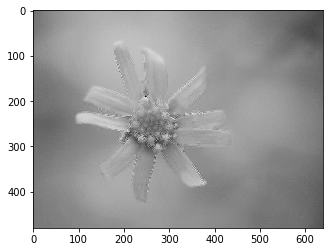

In [46]:
sharp = cv2.add(np.float64(gray),dst)
plt.imshow(np.uint8(sharp), cmap ='gray')

(480, 640, 3)


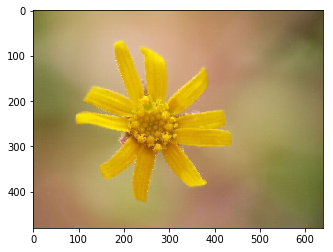

In [64]:
# 使用高斯拉普拉斯算子对彩色图像锐化
channels = cv2.split(src)
template = np.array([[0,1,0],[1,-4,1],[0,1,0]])
b = laplace(channels[0],template)
g = laplace(channels[1],template)
r = laplace(channels[2],template)
dst = cv2.merge([b,g,r]) / 255
rows,cols = b.shape
result = np.zeros((rows,cols,3),dtype=np.uint8)
print(result.shape)
for i in range(rows):
    for j in range(cols):
        pixel_r = dst[i,j,0] * 255
        if pixel_r > 255:
            pixel_r = 255
        if pixel_r < 0:
            pixel_r = 0
            
        pixel_g = dst[i,j,1] * 255
        if pixel_g > 255:
            pixel_g = 255
        if pixel_g < 0:
            pixel_g = 0
            
        pixel_b = dst[i,j,2] * 255
        if pixel_b > 255:
            pixel_b = 255
        if pixel_b < 0:
            pixel_b = 0
            
        result[i,j,0] = pixel_r
        result[i,j,1] = pixel_g
        result[i,j,2] = pixel_b
        
result = cv2.add(src,result)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
       

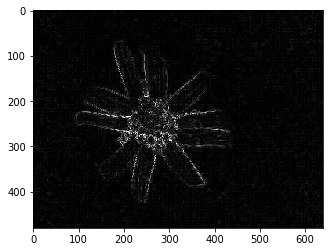

In [69]:
# 调用OpenCV函数
gray_lap = cv2.Laplacian(gray,cv2.CV_16S,ksize=3)
dst = cv2.convertScaleAbs(gray_lap)

plt.imshow(dst,cmap='gray')

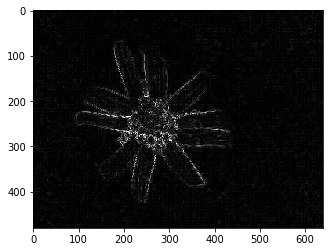

In [70]:
kernel_size = 3    
scale = 1    
delta = 0    
ddepth = cv2.CV_16S
gray_lap = cv2.Laplacian(gray,ddepth,ksize = kernel_size,scale = scale,delta = delta)    
dst = cv2.convertScaleAbs(gray_lap) 
plt.imshow(dst,cmap='gray')